**DEEP LEARNING**

- Traditional Machine Learning relies on hand crafted feature engineering
- Deep Learning enables feature learning from raw data
- Deep Learning is a subset of machine learning

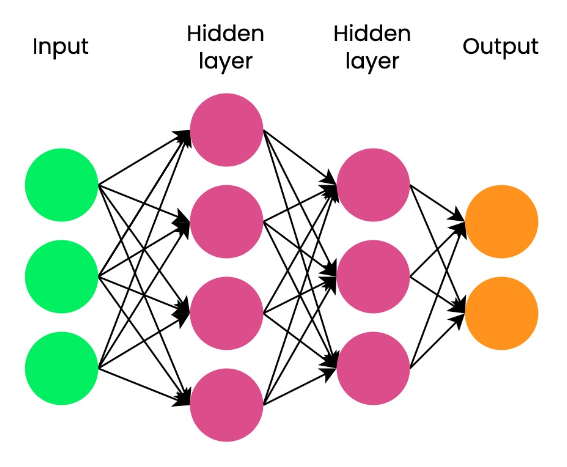

- Pytorch supports:
Image data with torchvision
Audio Data with torchaudio
Text Data with torchtext

- Fundamental data structure in pytorch is called a tensor
- It is like an array
- tensor.device displays which device the tensor is loaded on like a CPU or a GPU
- Deep learning may require a GPU as it enable parallel computing capabilities, faster training times and better performance



In [2]:
import torch
import numpy as np

list_a = [1, 2, 3, 4]

# Create a tensor from list_a
tensor_a = torch.tensor(list_a)

print(tensor_a)

array_a = np.array([5, 6, 7, 8])
array_b = np.array([1, 2, 3, 4])

# Create two tensors from the arrays
tensor_a = torch.from_numpy(array_a)
tensor_b = torch.from_numpy(array_b)

# Subtract tensor_b from tensor_a 
tensor_c = tensor_a - tensor_b

# Multiply each element of tensor_a with each element of tensor_b
tensor_d = tensor_a * tensor_b

# Add tensor_c with tensor_d
tensor_e = tensor_c + tensor_d
print(tensor_e)

tensor([1, 2, 3, 4])
tensor([ 9, 16, 25, 36], dtype=torch.int32)


- A linear layer takes an input, applies a linear function and returns output
- Each linear layer has a set of weights and biases associated with it
these can be known by using linear_layer.weight and linear_layer.bias respectivly
- Networks with only linear layers are called fully connected networks

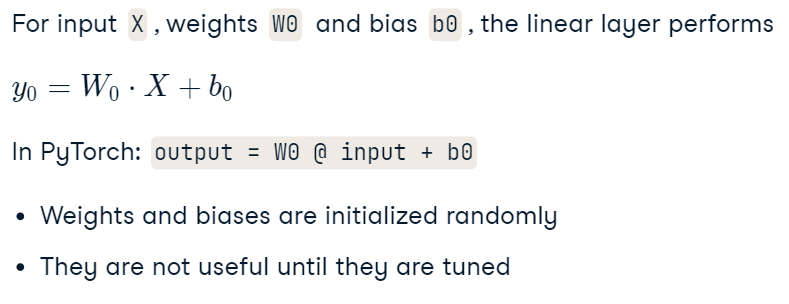

In [4]:
# CREATING A NEURAL NETWORK WITH 2 HIDDEN LAYERS

import torch.nn as nn

# Create input tensor with 3 features
input_tensor = torch.tensor([[0.3471, 0.4574, -0.2356]])

# Defining first linear layer
linear_layer = nn.Linear(in_features=3, out_features=2)

# Pass input to linear layer to generate output
output = linear_layer(input_tensor)
print(output)

tensor([[ 0.0534, -0.0441]], grad_fn=<AddmmBackward0>)


In [6]:
# STACKING LAYERS WITH nn.Sequential()

#Creating network with 3 linear layers
model = nn.Sequential(
    nn.Linear(10, 18),   # 10 input features and 18 output features
    nn.Linear(18, 20),   # 18 input features and 20 output features
    nn.Linear(20, 5)    # 20 input features and 5 output features
)

input_tensor = torch.tensor([[-0.0014, 0.4038, 1.0305, 0.7521, 0.7489, -0.3968, 0.0113, -1.3844, 0.8705, -0.9743]])
output = model(input_tensor)
print(output)

tensor([[ 0.1608,  0.2423, -0.2216,  0.2750,  0.0751]],
       grad_fn=<AddmmBackward0>)


**ACTIVATION FUNCTION**

- Two or more linear layers stacked with one another still perform a linear operation where the input is multiplied by the weight and a bias is added to it.
- Activation functions add non linearity to a network
a model can learn more complex relationships with non linearity
- The output of the last lineear layer is called the pre activation output which is passed to activation functions to obtain Transformed Output.

**SIGMOID FUNCTION:**
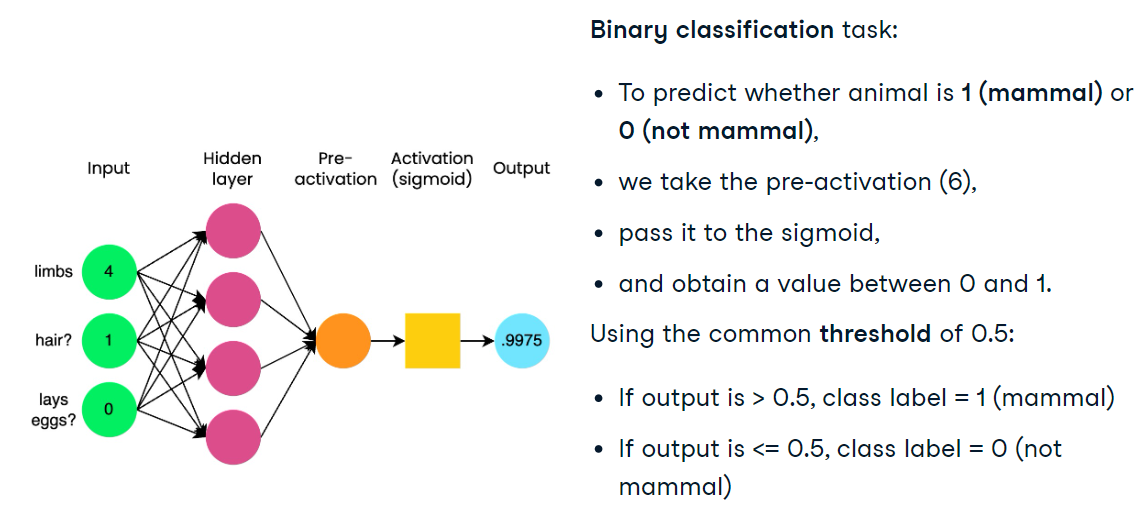

- It is commonly used as the last step in a network of linear layers and is equivalent to traditional logistic regression
- It is used for binary classification
- For multiclass classification problems, we use softmax

**SOFTMAX**

- used for multi class classification problems

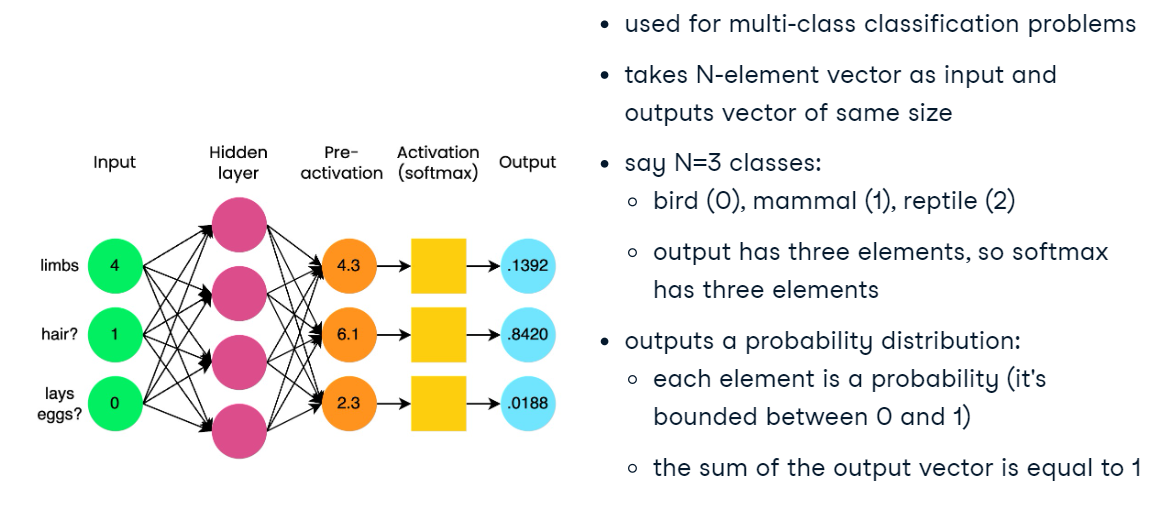


In [7]:
# IMPLEMENTING SIGMOID FUNCTION

import torch
import torch.nn as nn

input_tensor = torch.tensor([[6.0]])
sigmoid = nn.Sigmoid()
output = sigmoid(input_tensor)

print(output)

tensor([[0.9975]])


In [ ]:
# Implementation of Sigmoid in Network 

model = nn.Sequential(
    nn.Linear(6, 4),   # 6 input features and 4 output features
    nn.Linear(4, 1),   # 4 input features and 1 output features
    nn.Sigmoid()    # Sigmoid Activation Function
)

In [8]:
# IMPLEMENTING SOFTMAX FOR MULTICLASS CLASSIFICATION

import torch
import torch.nn as nn

# creating input tensor
input_tensor = torch.tensor([[4.3, 6.1, 2.3]])

# applying softmax to the last dimension
Probabilities = nn.Softmax(dim = -1)        # dim = -1 indicates that softmax is applied to input tensors last dimension
output_tensor = Probabilities(input_tensor)

print(output_tensor)

tensor([[0.1392, 0.8420, 0.0188]])


**FORWARD PASS**

- input data is passed forward or propogated through a network.
- Output of final layer is called the prediction
- The final output can be binary classification, multiclass classifications and continuous numerical predictions

**BACKWARD PASS/BACKPROPOGATION**
- The process by which weights and biases are updated during model training


In the Training Loop:
1) We propogate the data forward
2) Compare the output to true values
3) Backpropogate to update model weights and biases
4) Repeat until weights and biases are tuned to produce useful outputs 

In [3]:
# FORWARD PROPOGATION
import torch
import torch.nn as nn


input_data = torch.tensor(
    [
        [-0.4421, 1.5207, 2.0607, -0.3647, 0.4691, 0.0946],
        [-0.9155, -0.0475, -1.3645, 0.6336, -1.9520, -0.3398],
        [0.7406, 1.6763, -0.8511, 0.2432, 0.1123, -0.0633],
        [-1.6630, -0.0718, -0.1285, 0.5396, -0.0288, -0.8622],
        [-0.7413, 1.7920, -0.0883, -0.6685, 0.4745, -0.4245]
    ]
)

# Create Binary Classification model

model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, 1),
    nn.Sigmoid()
)

output = model(input_data)
print(output)

tensor([[0.6557],
        [0.4603],
        [0.4743],
        [0.4398],
        [0.4887]], grad_fn=<SigmoidBackward0>)


**MLUTICLASS CLASSIFICATION**

- Each row give the probability of the attribute belonging to any one class
- Sum of all elements in a row is 1

In [4]:
# MULTICLASS CLASSIFICATION

#Specify the number of classes
n_classes = 3
model = nn.Sequential(
    nn.Linear(6, 4),
    nn.Linear(4, n_classes),
    nn.Softmax(dim = -1)
)
output = model(input_data)
print(output)

tensor([[0.2723, 0.5428, 0.1849],
        [0.3911, 0.5153, 0.0936],
        [0.1885, 0.6342, 0.1772],
        [0.4078, 0.4873, 0.1049],
        [0.2237, 0.6150, 0.1613]], grad_fn=<SoftmaxBackward0>)


**FORWARD PASS ON REGRESSION**

- Predicting Continuous Values
- No activation function at the end
- Last dimension returns output with one feature
- Outputs continuous values, one for each row

In [6]:
model = nn.Sequential(
    nn.Linear(6,4),
    nn.Linear(4, 1)
)
model(input_data)
print(output)

tensor([[0.2723, 0.5428, 0.1849],
        [0.3911, 0.5153, 0.0936],
        [0.1885, 0.6342, 0.1772],
        [0.4078, 0.4873, 0.1049],
        [0.2237, 0.6150, 0.1613]], grad_fn=<SoftmaxBackward0>)


**LOSS FUNCTION**

- Tells how good a model is at making predictions during training
- The loss function takes the scores tensor as input which is the model predictions before the Softmax Function along with the one hot encoded ground truth label
- It outputs a single float
- The goal of training is to minimise the loss.


In [ ]:
# Transforming Labels with One Hot Encoding

import torch.nn.functional as F

F.one_hot(torch.tensor(0), num_classes=3) # Outputs 1 for the first class and zero for the other classes

F.one_hot(torch.tensor(1), num_classes=3) # Outputs 1 for the second class and zero for the other classes

# CRODD ENTROPY LOSS FUNCTION 

scores = tensor([[-0.1211, 0.1059]])
one_hot_target = tensor([[1, 0]])

criterion = nn.CrossEntropyLoss()
criterion(scores.double(), one_hot_target.double())

**MINMISING THE LOSS**

- High Loss: model prediction is wrong
  Low Loss: model prediction is correct

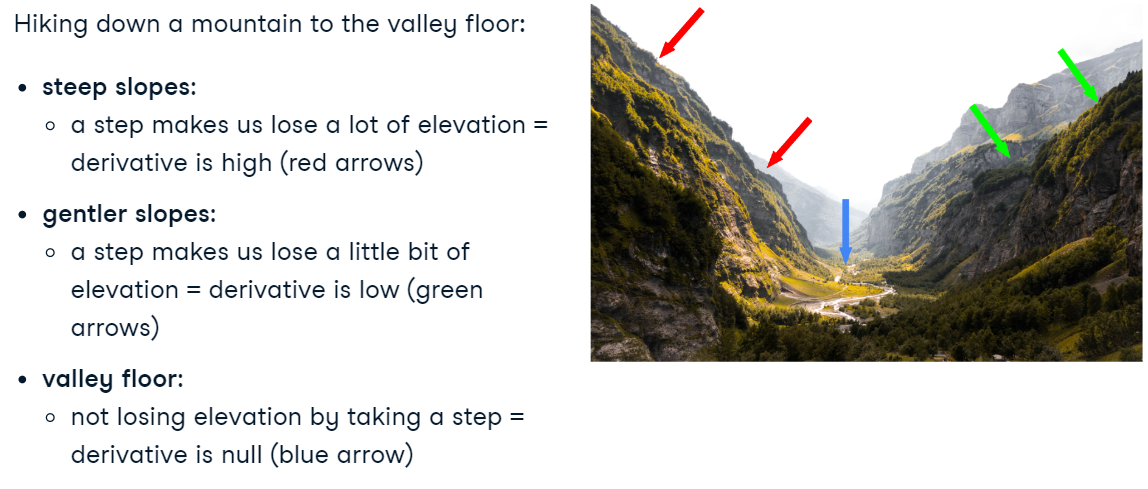

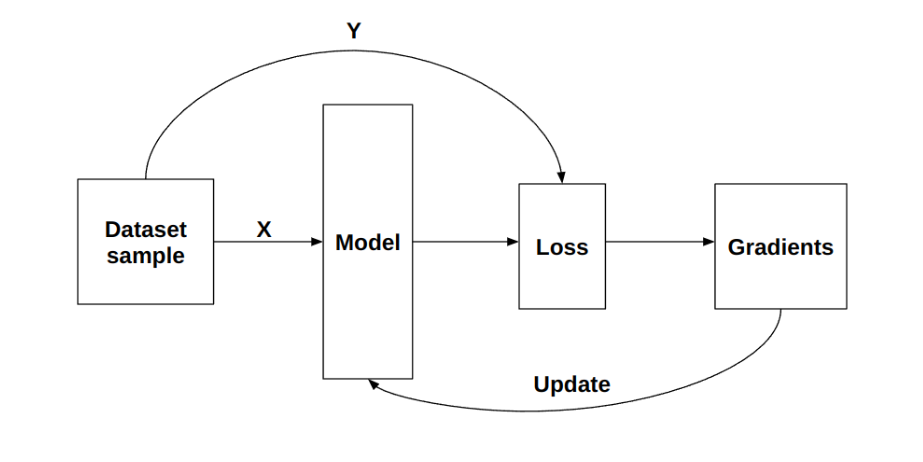

- For a network of three layers, L0, L1 and L2; we calculate the local gradients for L0, L1 and L2 using backpropogation. Calculate loss gradient for L2, then use L2 gradient to calculate L1 gradient and so on.
- When minimising loss functions, our goal is to find the global minimum of a non-convex function(A function having more than one local minimum)

**GRADIENT DESCENT**

- In pytorch, an optimiser takes care of the weight updates
- The most common optimiser is SGD(Stochastic Gradient Descent)
- The optimiset calculates gradients for us and updates model parameters automatically by calling optimiser.step()

In [ ]:
# BACKPROPOGATION

model = nn.Sequential(
    nn.Linear(16, 8),
    nn.Linear(8, 4),
    nn.Linear(4, 2)
)

prediction = model(sample)

# Calculating the loss and computing the gradients

criterion = nn.CrossEntropyLoss()
loss = criterion(prediction, target)
loss.backward()

# Access Each Layers Gradients
 
model[0].weight.grad, model[0].bias.grad
model[1].weight.grad, model[1].bias.grad
model[2].weight.grad, model[2].bias.grad

# Updating Model Parameters
# Update the weights by subtracting the local gradients scaled by learning rate
# Learning rate is typically small

lr = 0.001
#Update the weights
weight = model[0].weight
weight_grad = model[0].weight.grad
weight = weight - lr * weight_grad

#Update the weights
bias = model[0].bias
bias_grad = model[0].bias.grad
bias = bias - lr * bias_grad

#GRADIENT DESCENT
import torch.optim as optim

#Create the optimiser
optimiser = optim.SGD(model.parameters(), lr = 0.001)
optimiser.step()

**TRAINING A NEURAL NETWORK**

1) Create a model
2) Choose a loss function
3) Create a dataset
4) Define an optimiser
5) Run a training loop where for each sample of the dataset, we repeat:
    Calculating loss(forward pass)
    Calculate local gradients
    Updating model parameters

**MEAN SQUARED ERROR LOSS**

- Used for regression problems
- It is the squared difference between the prediction and the ground truth


In [ ]:
# TRAINING MODEL ON SALARY DATASET
# Features are turned into categories and taget is salary in usd(not a category but a continuous quantity)
# For regression problems, we cannot use Sigmoid or Softmax as the last activation function as they are only used in classification problems
# We need to use a different loss function because cross entropy loss is also used only for classification problems

# USING MEAN SQUARED ERROR LOSS
def mean_squared_loss(prediction, target):
    return np.mean((prediction-target)**2)
# Another way of implementing MSE loss
criterion = nn.MSELoss()
#Predicion and target are float tensors
loss = criterion(prediction, target)


# BEFORE THE TRAINING LOOP

# Create the dataset and the dataloader
dataset = TensorDataset(torch.tensor(features).float(), torch.tensor(target).float())
dataloader = DataLoader(dataset, batch_size = 4, shuffle = True)

# Creting the model
# As this is a regression problem, we do not need one hot encoding and the final linear layer will output a single float
model = nn.Sequential(
    nn.Linear(4, 2),
    nn.Linear(2, 1)
)

# Creating the Loss and Optimiser
criterion = nn.MSELoss()
optimiser = optim.SGD(model.parameters(), lr = 0.001)

# Loop through the dataset multiple times
for epoch in range(num_epochs):
    for data in dataloader:
        # Set the gradient to zero
        optimiser.zero_grad()
        # Get feature and target from the data loader
        feature, target = data
        # Run a forward pass
        pred = model(feature)
        # Compute loss and gradients
        loss = criterion(pred, target)
        loss.backward()
        # Update the parameters
        optimiser.step()

**ACTIVATION FUNCTIONS**

**LIMITATIONS OF SIGMOID FUNCTION AND SOFTMAX FUNCTION**
- Output is bounded between 0 and 1
- Can be used anywhere in the network
- The gradient values tend to zero for high and lower values which causes the function to saturate. This causes problems during backpropogation where it can lead to vanishing gradients which means that the values of weights will not be changed.

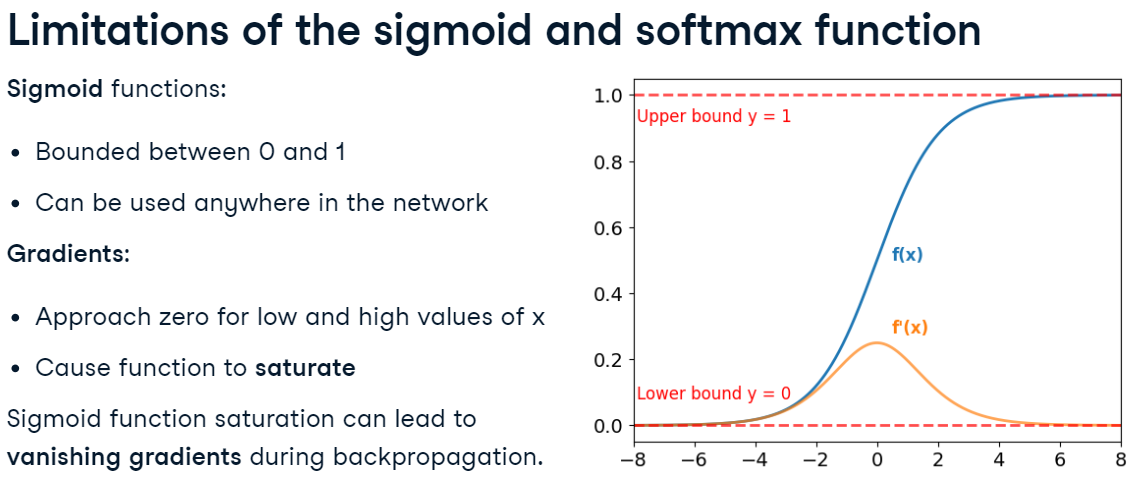

**ReLU ( RECTIFIED LINEAR UNIT )**
- For positive inputs, the output is equal to the input 
- For strictly negative inputs, the output is zero
- Function does not have an upper bound and the gradients do not converge to zero i.e. It overcomes the vanishing gradients problem

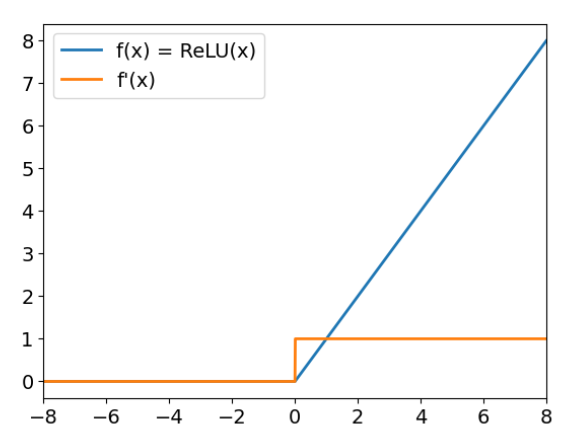

**LEAKY ReLU**
- variation of ReLU
- behaves similar to ReLU for positive inputs
- for negative inputs, multiplies them by a small coefficient(defaulted to 0.01). Thus it has non null gradients for negative inputs


In [ ]:
relu = nn.ReLU()
leaky_relu = nn.LeakyReLU(negative_slope=0.05)

**NEURAL NETWORK ARCHITECHTURE**

- A neuron of a linear layer contains (N+1) learnable parameters where N=No. of dimensions of previous layer and +1 for the bias
- When designing a neural network, the dimensions of the input layers, the first layer and the coutput layers are fixed
    The no. of neurons in input layer is the number of features in our dataset (n_features)
    The no. of neurons in the output layer is the number of classes we want to predict (n_classes)
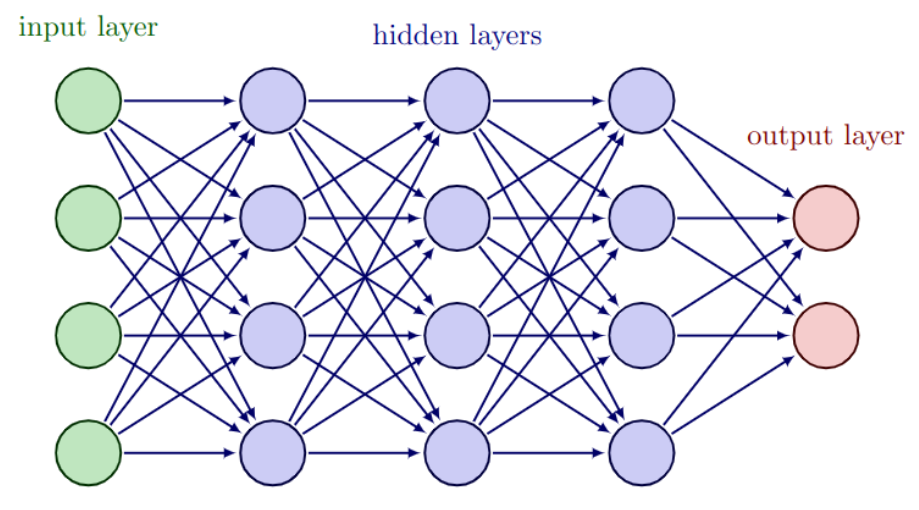

- Increasing the number of hidden layers means increasing the number of model parameters i.e increasing the model capacity
- The number of parameters in a model is a good metric to determine the capacity of the model
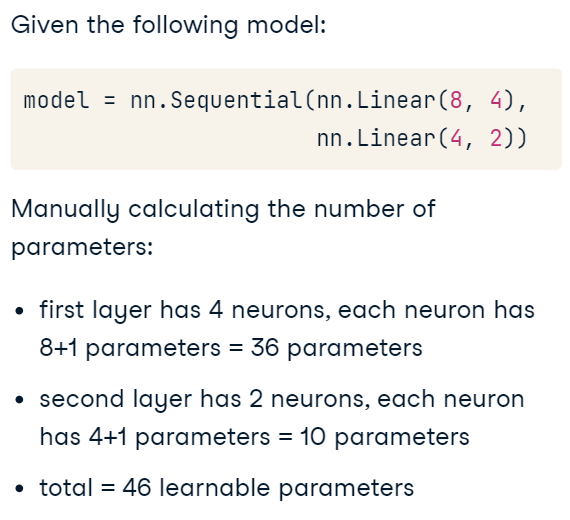

In [ ]:
model = nn.Sequential(
    nn.Linear(n_features,8),
    nn.Linear(8, 4),
    nn.Linear(4, n_classes)
)

# Counting the number of Parameters(
total = 0
for parameter in model.parameters():
    total += parameter.numel()
print(total)

**LEARNING RATE AND MOMENTUM**
- Training a neural network is basically an optimization problem where we tweak the models parameters to minimise the loss function
  sgd = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.95)  
- Learning rate(lr) controls the step size of the model (step size = gradient * lr)
- Momentum controls the intertia of the optimizer
- Bad values of lr and momentum can lead to longer training times and bad overall performances (poor accuracy)

**OPTIMAL LEARNING RATE**
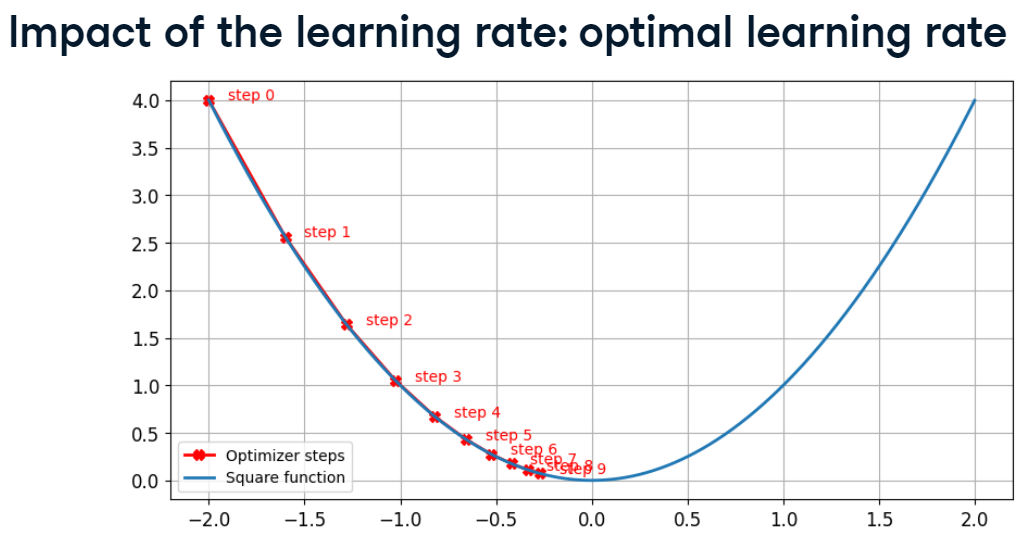
**SLOW LEARNING RATE**
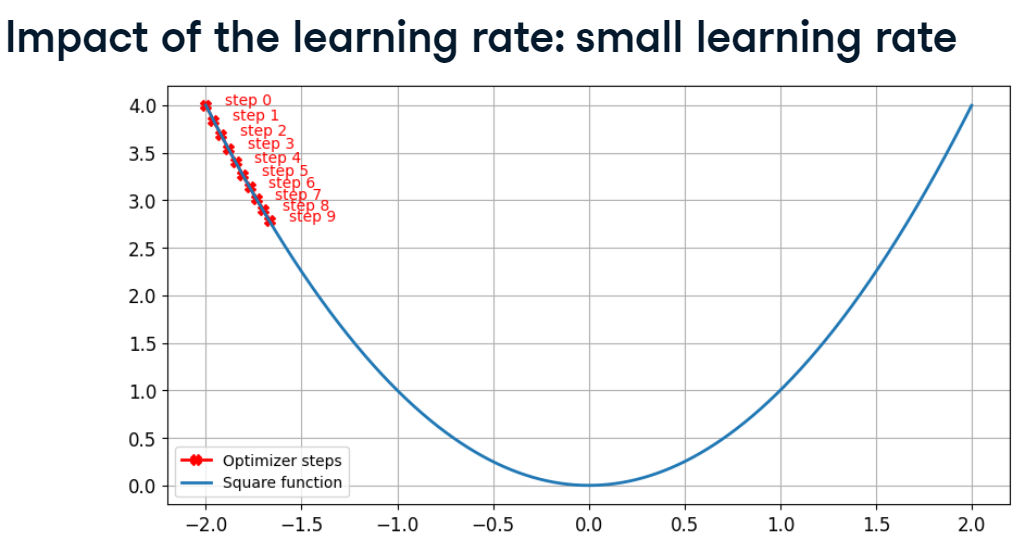
**HIGH LEARNING RATE**
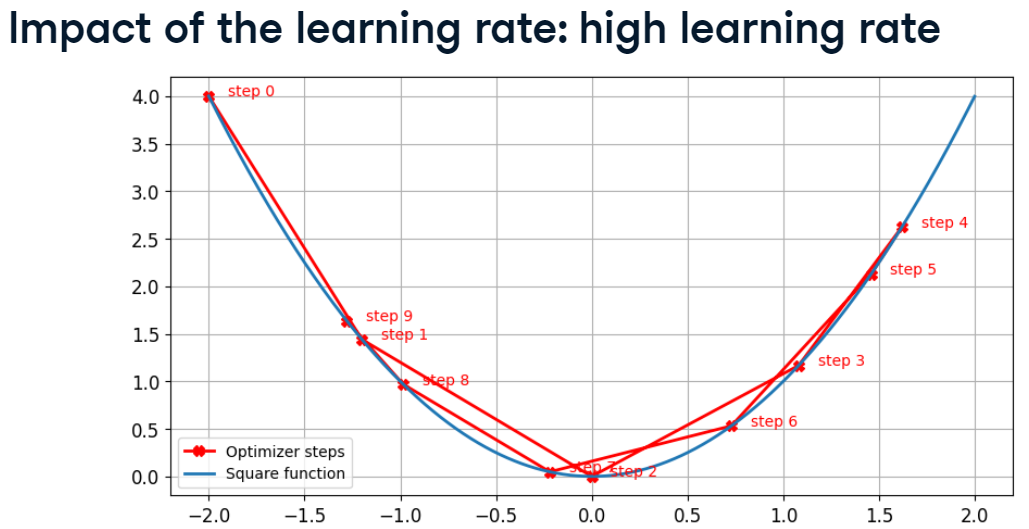

**WITHOUT MOMENTUM**
- It gets stuck in a local minimumm and is unable to find the gloabal minimum
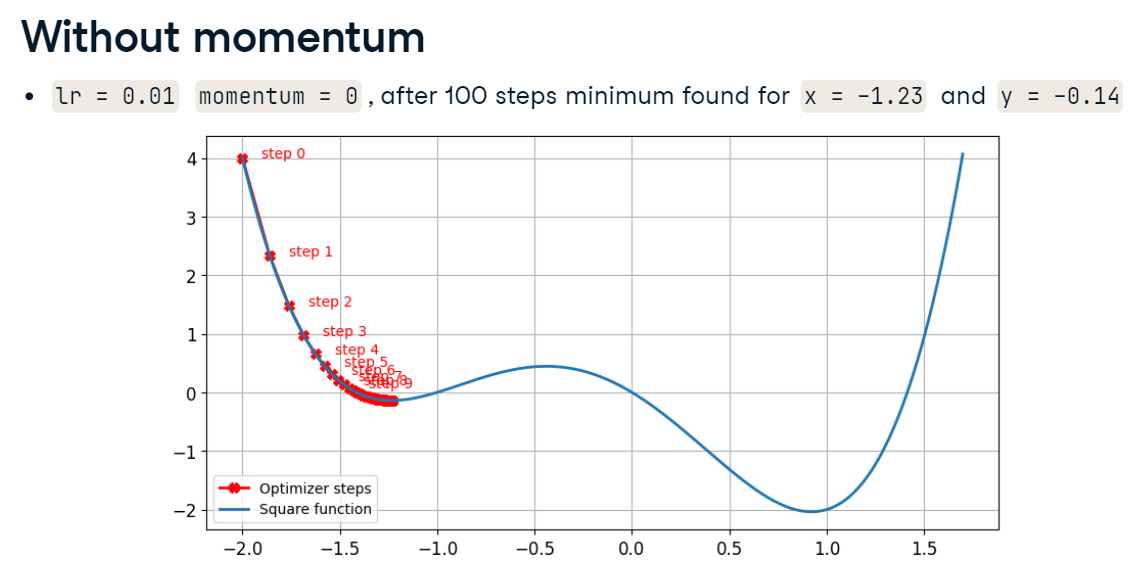

**WITH MOMENTUM**
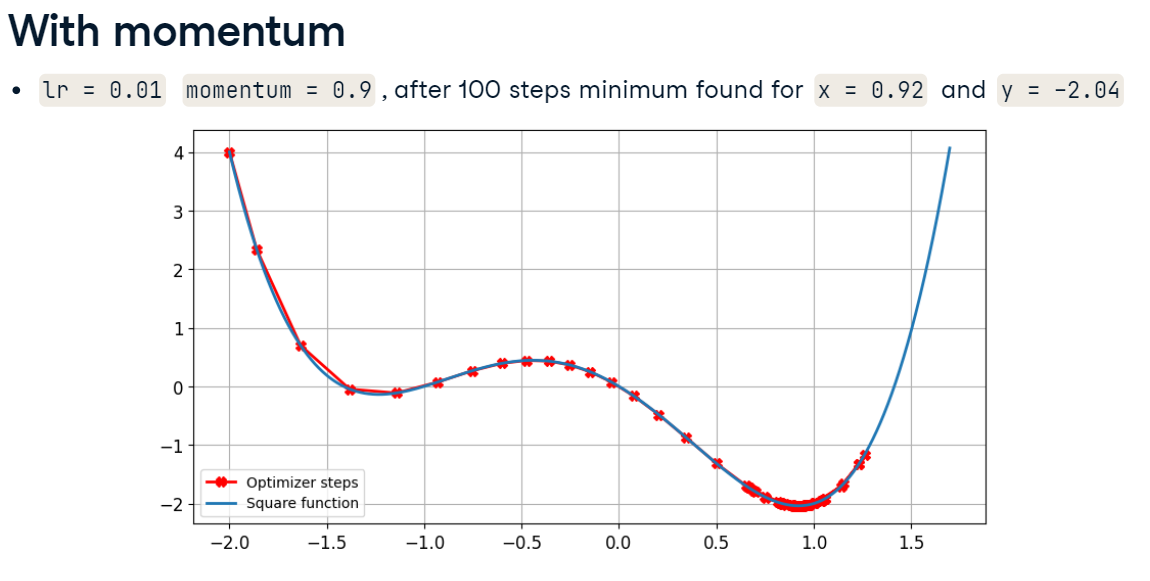

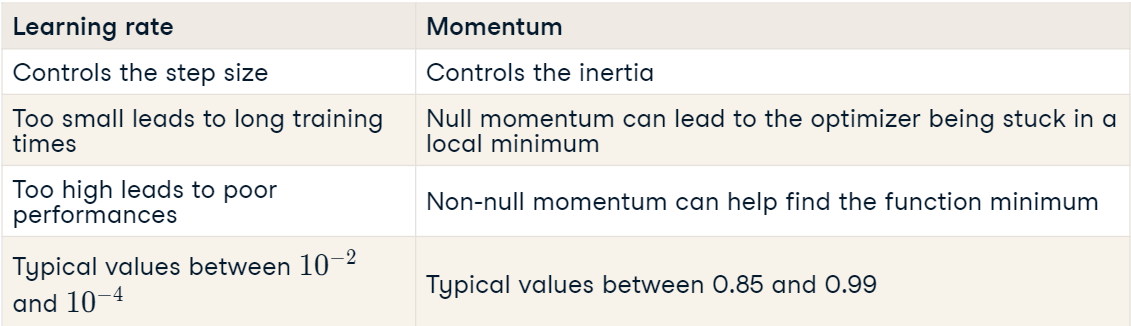

In [ ]:
# SGD Optimiser
sgd = optim.SGD(model.parameters(), lr = 0.01, momentum = 0.95)

**LAYER INITIALIZATION, TRANSFER LEARNING AND FINE TUNING**

- Layer weights can be initialized using the nn.init fucntion of pytorch
- Transfer learning is used to initialize layer weights
- *Transfer Learning:* Reusing a model trained on a first task for a second similar task to accelerate the training process.
- *Fine Tuning:* A type of transfer learning where we load weights from a previouslt trained model but train the model using a smaller learning weight. Not every layer is trained(some of them are freezed)
RULE OF THUMB: freeze early layers of network and fine tune layers closer to output layer


In [ ]:
# Creating a linear layer and looking at the max and min value of its weights

import torch.nn as nn
layer = nn.Linear(64, 128)
print(layer.weight.min(), layer.weight.max())

(tensor(-0.1250, grad_fn = <MinBackward1>), tensor(0.1250, grad_fn = <MinBackward1>))

# LAYER INITIALIZATION

import torch.nn as nn
layer = nn.Linear(64, 128)
nn.init.uniform_(layer.weight)
print(custom_layer.fc.weight.min(), custom_layer.fc.weight.max())

# FINE TUNING LAYERS

import torch.nn as nn
model = nn.Sequential(
    nn.Linear(64, 128),
    nn.Linear(128, 256)
)

if name, param in model.named_parameters():
    if name == '0.weight':
        param.requires_grad = False

In [ ]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import TensorDataset

pd.read_csv('animals.csv')
features = animals.iloc[:, 1:-1]  # Making a numpy array of features from the animals dataset 
X = features.to_numpy()
print(X)
target = animals.iloc[:, -1]
y = target.to_numpy() # Making a numpy array of the target class from the animals dataset

# Creating a pytorch dataset
dataset = TensorDataset(torch.tensor(X).float(), torch.tensor(y).float())
#Access an individual sample
sample = dataset[0]
input_sample, label_sample = sample
print("input sample: ", input_sample)
print("output sample: ", output_sample)

# Recalling DataLoader
from torch.utils.data import DataLoader
batch_size = 2 # Determines how many samples we take from the dataset per interation 
shuffle = True # Tells the DataLoader to shuffle the dataset on each iteration
for batch_inputs, batch_labels in dataloader:
    print("batch inputs: ", batch_inputs)
    print("batch labels: ", batch_labels)
    

**MODEL EVALUATION**

- Raw data is split into three subsets - training, validation and testing
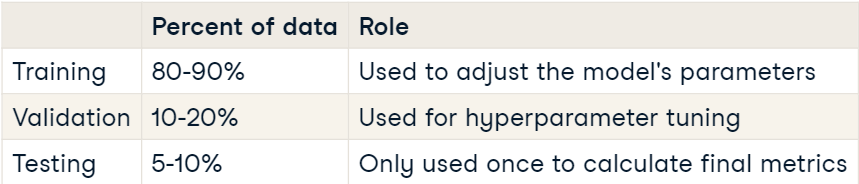

**LOSS**

- for each epoch, we sum up the loss of each iteration of the training set DataLoader
- At the end of each epoch, we calculate the mean value of the loss
- The same approach is taken to calculate the training loss and the validation loss

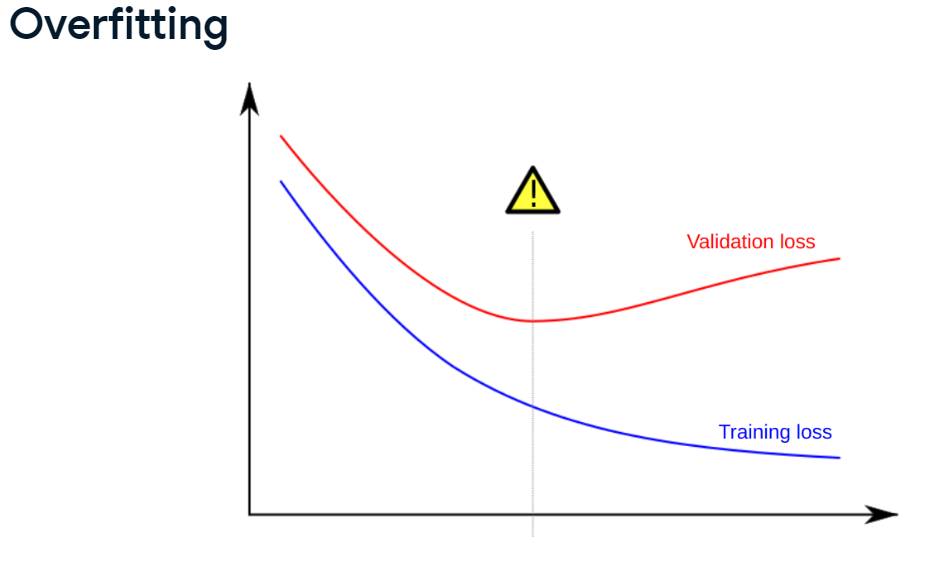

**ACCURACY**



In [ ]:
#  TRAINING LOSS
training_loss = 0.0
for i, data in enumerate(trainloader, 0):
    # Run the forward pass
    ...

    # Calculate the loss
    loss = criterion(outputs, labels)
    # Calculate the gradients
    ...


    # Calculate the sum of loss
    training_loss += loss.item()
epoch_loss = training_loss / len(trainloader)

# VALIDATION LOSS
validation_loss = 0.0
model.eval()    # Put model in evaluation mode as some layers behave differently at training and validation stages
with torch.no_grad(): #Speed up the foreard pass by not calculating the gradient
    for i, data in enumerate(validationloader, 0):
    # Run the forward pass
    ...

    # Calculate the loss
    loss = criterion(outputs, labels)
    
    # Calculate the sum of loss
    validation_loss += loss.item()
epoch_loss = validation_loss / len(validationloader)
model.train()

# CALCULATING ACCURACY

import torchmetrics

# create accuracy metric using torch metrics
metric = torchmetrics.Accuracy(task ="multiclass", num_classes = 3)
for i, data in enumerate(dataloader, 0):
    features, labels = data
    outputs = model(features)
    # Calculate accuracy over the batch
    acc =  metric(output, labels.argmax(dim = -1))
# Calculate accuracy over the whole epoch
acc = metric.compute()
print(f"Accuracy on all data: {acc}")
# Reset the metric for the next data
metric.reset()

**FIGHTING OVERFITTING**

- overfitting takes place when the model does not generalize to unseen data
- this results in good performance on training set but poor performance on the test set

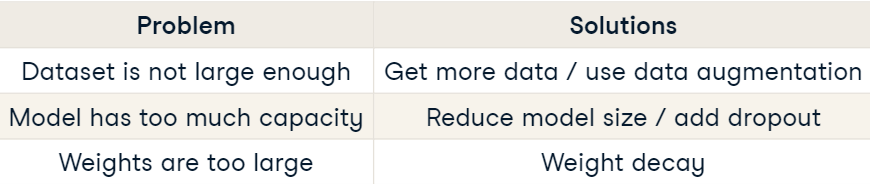

**STRATEGIES:**
- Reduce model size or add dropout layer
- Use weight decay to force parameters to remain small
- Get more data or use data augmentation


1) Regularization using Dropout Layer:
- randomly a fraction of input neurons is set to zero during training. corresponding connections are temporarily removed from the network making the network less likely to rely on specific features
- Dropout layers are added after the activation function
- these behave differently between training and evaluation and we must remember to switch modes using model.train() and model.eval()

2) Regularization using Weight Decay:
-is done using parameter of optimizer
optimizer = optim.SGD(model.parameters(), lr = 1e-3, weight_decay = 1e-4)
- It adds penalty to loss fucntion to discourage large weights and biases
- subtracted from gradient during backpropogation
- The higher the value of this parameter, the less likely the model is to overfit

3) Data Augmentation:
- Data augmentation is commonly applied to image data, which can be rotated and scaled, so that different views of the same face become available as "new" data points.

In [ ]:
# Regularization using Dropout Layer

model = nn.Sequential(
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.Dropout(p = 0.5) # p indicates the probability of setting a neuron to zero
)
features = torch.randn((1, 8))
model(i)

# Regularization using Weight Decay

optimizer = optim.SGD(model.parameters(), lr = 1e-3, weight_decay = 1e-4)


**STEPS TO MAXIMISE PERFORMANCE**

1) 
- Create a model than can overfit a training set. Set a performance baseline to set for with the validation set. 
- Then, reduce overfitting to improve performance on the validation set. 
- Fine tune Hyperparameters.Before overfitting the whole training set, it is recommended to overfit a single data point.

2) Goal: Maximise Validation Accuracy
- Experiment with dropout, data augmentation, weight decay and reducing model capcity
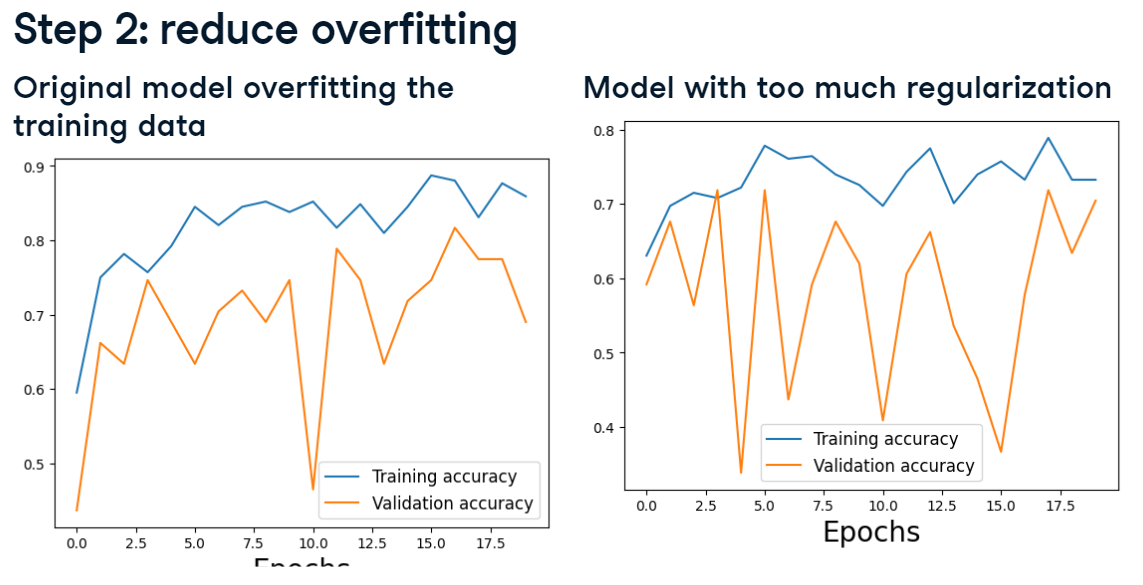

3) Fine Tune hyperparameters
- Use Grid Search to fine tune hyper parameters
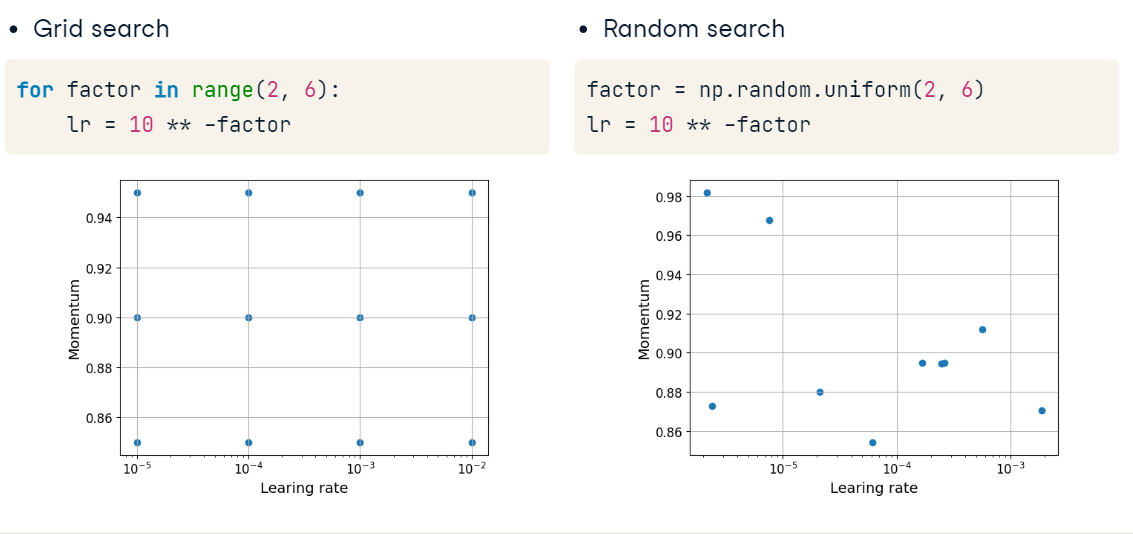



In [ ]:
# Overfitting a single data point
# It gives an accuracy of 1 and loss of 0 and helps find bugs in code
features, labels = next(iter(trainloader))
for i in range(1e3):
    outputs = model(features)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()